### MRI brain tumor detection dataset
Dataset link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

### Import packages

In [1]:
import numpy as np

import torch
# DataLoader object is going to help us to iterate through our data very easily.It help us to break out our dataset into mini batches.
from torch.utils.data import Dataset,ConcatDataset, DataLoader 

# glob: glob go to the directory of our dataset and grab all the images.
import glob

# matplotlib: visualizing stuff in python
import matplotlib.pyplot  as plt

# sklearn are used to evaluate the performance of our model. Confusion Matrix is a way to numerically represent four different combinations of right or wrong for our dataset.
# accuracy score: to evaluate the performance of their classifier.
from sklearn.metrics import confusion_matrix, accuracy_score

# cv2 is a computer vision package. It helps to read image data and video data.
import cv2

import random

# ![img alt text](confusion_matrix.png)

### Reading the Images - Preprocessing

In [2]:
tumor = []
path = "./brain_tumor_dataset/yes/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    tumor.append(img)

In [3]:
len(tumor)

154

In [4]:
for img in tumor:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [5]:
healthy = []
path = "./brain_tumor_dataset/no/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    healthy.append(img)

In [6]:
len(healthy)

91

In [7]:
for img in healthy:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [8]:
# Convert the lists to numpy arrays.
healthy = np.array(healthy)
tumor = np.array(tumor)

In [9]:
tumor.shape
# (154, 128, 128, 3)
# We have 154 images. 
# Each of image has 3 channels
# Each channel has width and height of 128

(154, 128, 128, 3)

In [10]:
healthy.shape

(91, 128, 128, 3)

In [11]:
# We need to pass the arrays in the form of the tuple
All = np.concatenate((healthy,tumor))


In [12]:
All.shape

(245, 128, 128, 3)

### Visualizing Brain MRI images

In [13]:
# 5 is not included. It randomly choses integer value between 0 & 5.
# 3 means, i want to select 3 random numbers b/w values 0 - 5
print(np.random.choice(5,3))

# if we don't want the choice to be repeated
print(np.random.choice(5,3, replace=False))


[3 3 0]
[0 3 4]


In [14]:
healthy[0].shape

(128, 128, 3)

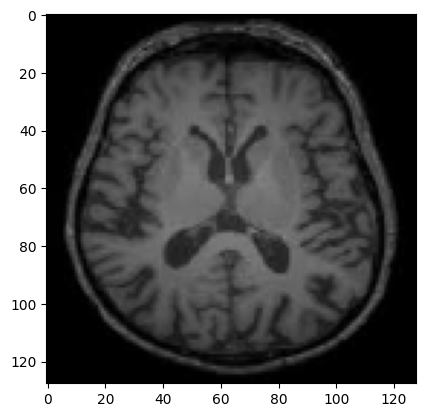

In [15]:
plt.imshow(healthy[0])

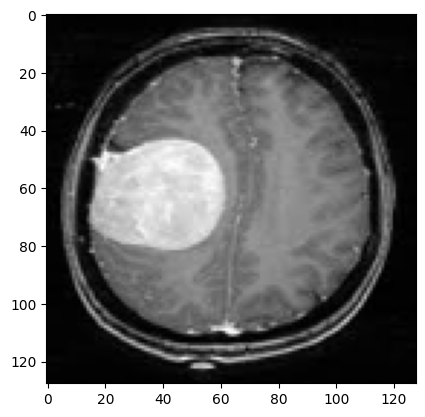

In [16]:
plt.imshow(tumor[0])

In [17]:
def plot_random(healthy, tumor, num=5):
    healthy_images = healthy[np.random.choice(healthy.shape[0],num, replace=False)]
    tumor_images = tumor[np.random.choice(tumor.shape[0],num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        # In matplotlib sublots are not indexed from zero. They are indexed from one. 
        # sublot(Row, Columns in Row, subplot no.)
        plt.subplot(1,num, i + 1)
        plt.title("healthy")
        plt.imshow(healthy_images[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i + 1)
        plt.title("tumor")
        plt.imshow(tumor_images[i])


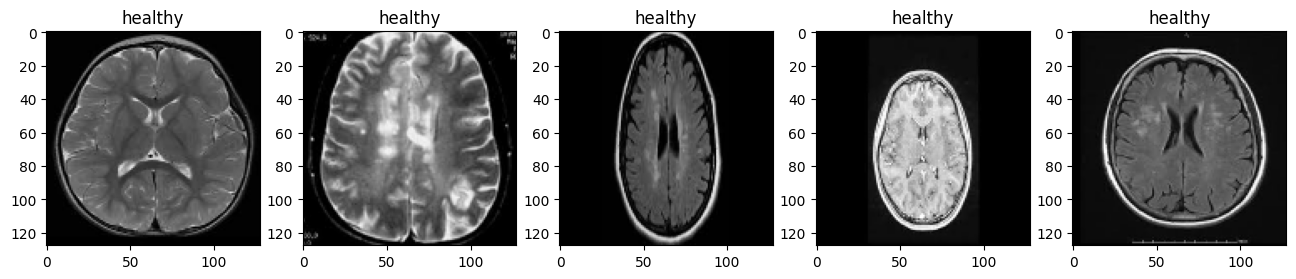

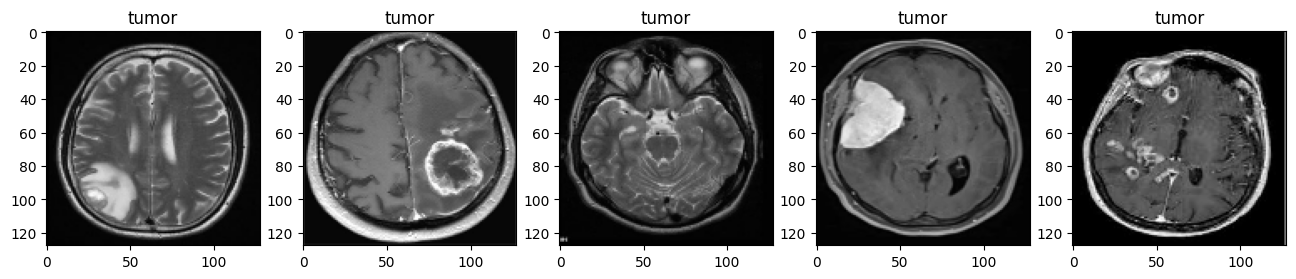

In [18]:
plot_random(healthy,tumor)

### Create Torch Dataset Class
##### What is Pytorch's Abstract Dataset Class

In [19]:
# pytorch has a Dataset class already
class Dataset(object):
    # There is no defined constructor.

    # getitem magical function is used to retrieve a certain datapoint living at a certain index of dataset
    def __getitem__(self, index):
        raise NotImplementedError
    
    # len magical function is used to retrieve a length of a dataset
    def __len__(self):
        raise NotImplementedError
    
    # a = 'st'
    # b = 'zz'
    # a + b = stzz
    # add magical fuction,concatenate the strings and return the result of the concatenation
    def __add__(self, other):
        return ConcatDataset([self, other])

In [20]:
class MRI(Dataset):
    def __init__(self, scores):
        self.x = scores
    
    def __getitem__(self, index):
        return self.x[index]

    def __len__(self):
        return len(self.x)

In [21]:
s = [1,2,3,4,5]
d = MRI(s)

In [22]:
d.x

[1, 2, 3, 4, 5]

In [23]:
d[2]

3

In [24]:
len(d)

5

In [25]:
s1 = [1, 2, 3, 4, 5]
d1 = MRI(s1)

s2 = [6, 7, 8, 9, 10]
d2 = MRI(s2)

d3 = d1 + d2
len(d3)

10

### Creating MRI custom dataset class

In [26]:
class MRIDataset(Dataset):
    def __init__(self):
        healthy = []
        path = "./brain_tumor_dataset/no/*jpg"
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            # print(img.shape)
            healthy.append(img)
        
        tumor = []
        path = "./brain_tumor_dataset/yes/*jpg"
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[1], img.shape[0]))
            # print(img.shape)
            tumor.append(img)
        
        healthy = np.array(healthy, dtype=np.float32)
        # print("Healthy", healthy.shape)
        tumor = np.array(tumor, dtype=np.float32)
        # print("Tumor", tumor.shape)
    
        # LABELS - Tumor with 1's & Halthy with 0's
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        # print(tumor_label)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        # print(healthy_label)

        # CONCATENATE
        # Concatenate across first access, it means that 100 of images attach that to 200 of these images
        self.images = np.concatenate((tumor, healthy), axis=0) # (100,512,512,3) + (200,512,512,3) = (300, 512, 512, 3)
        self.labels = np.concatenate((tumor_label, healthy_label)) # We don't need axis = 0 becasue 1s and 0s have 1 dimention. They don't have multiple channels.


    
    def __getitem__(self, index):
        return {'image': self.images[index], 'label': self.labels[index]}

    def __len__(self):
        return self.images.shape[0]

    def normalize(self):
        self.images = self.images/255.0

In [27]:
mri_dataset = MRIDataset()
img = mri_dataset[5]['image']
img.shape

(3, 128, 128)

In [28]:
np.max(img)

255.0

In [29]:
mri_dataset.normalize()

In [30]:
img = mri_dataset[244]['image']
np.max(img)

0.9647059

### Creating a dataloader
#### The world without dataloaders - using for loop

In [31]:
import sys
mri2 = MRIDataset()
mri2.normalize()
indexes = list(range((len(mri2.images))))
random.shuffle(indexes) # shuffle is an in-place operation

# for idx in indexes:
#     img = mri2[idx]['image']
#     img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])
#     plt.title(mri2[idx]['label'])
#     plt.imshow(img)
#     sys.exit()
    # plt.show()

#### The world without dataloaders - using for Next(Iter) commands

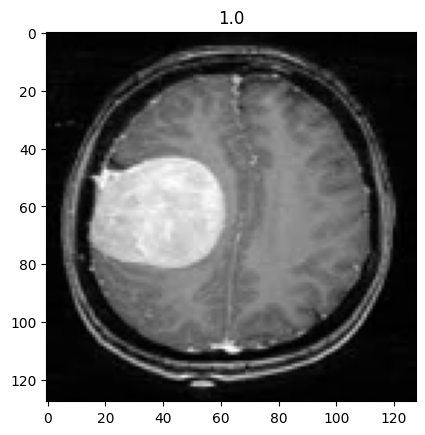

In [32]:
it = iter(mri2)
for idx in range(1):
    img = next(it)['image']
    img = img.reshape([img.shape[2], img.shape[1], img.shape[0]])
    plt.title(mri2[idx]['label'])
    plt.imshow(img)
    plt.show()
    # sys.exit()

### The world with dataloaders

In [33]:
# We need to pass the iterable object
mri3 = MRIDataset()
mri3.normalize()
dataloader = DataLoader(mri3, batch_size=10, shuffle=True) # to create shuffle data, batch_siz=10e: grab 10 images at each iteration.

In [34]:
for sample in dataloader:
    # img = sample['image']
    lable = sample['label']
    
    # print(sample['image'].shape) # torch.Size([1, 3, 128, 128]): 1 image of the [3, 128, 128] dimentions, it means batch_size is 1 in dataloader

    print(sample['image'].shape) # torch.Size([10, 3, 128, 128]): 10 imges of the [3,128,128] dimentions
    # img = sample['image'].squeeze() # to remove the extra dimentionality
    # print(img.shape) # torch.Size([3, 128, 128])

    # img = img.reshape([img.shape[1], img.shape[2], img.shape[0]])
    # plt.title(lable)
    # plt.imshow(img)
    # sys.exit()

torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([5, 3, 128, 128])


### Create a Model

- Convolutional Neural Networks: Convolutional Neural Network is also known as CNN or comp net.. CNN is an artificial neural network that is so far been most popularly used for analyzing images.
- We can think of a CNN as an artificial neural network that has some type of specialization for being able to pick out or detect patterns and make sense of them.
- Pattern detection is what that makes CNN useful for image analysis.

In [35]:
# 
import torch.nn as nn # neural network
import torch.nn.functional as F # this is where the actual functionalities of neural network is stored. 

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__() # nn.Module class has already a constuctor in it.. We want to keep all the stuff of constructor. In order to access the parts of parents class, we use the super method. In super method we need to pass the name of our class and self. after that i am saying i want to access to __init__()

        # convotional layers. e.g: conv2d is a layer, that deal with images.
        # self.conv1 = nn.Conv2d()
        # self.conv2 = nn.Conv2d()

        self.cnn_model = nn.Sequential( # Sequential is allowed us to define the sequential objects. Sequential Objects takes all types of layers, whatever type of layer that we want to pass to it.
            
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)), # to define a CNN, firt thing we need to define, how many number of channels does the input have. Because this the first convolutional layer that we are dealing with, have three channels. out_channels mean how many convolutional filters we wanna have in this particular convolutional layer. Currently, we have choose 6 filters. We can also call them 6 kernals. We have defined the size of each kernal is 5. We can pass it like a tupe(5,5), it means height and width is 5. So, we can only write 5 instead of pasing the tupple.

            # use a comma to add next convolutional layer or whatever.

            nn.Tanh(),  # It's typical convulution in CNN to add different types of non-linearity to our neural network. e.g. it is common to have hyperbolic tangent non-linearity. nn.Tanh() doesn't ask for any type of arguments/parameters becausse it doesn't have any learnable parameter to it. What is it? It is actually a mathematical operation that is going to be implemented in each one of the six channels of data that are going to be passed out.

            nn.AvgPool2d(kernel_size=2, stride=5), # next thing that is common to do after adding non-linearity is actually pulling. We have used an average pulling. What it does? We have define a window of a window size that we want to consider as kernal size. So, that window keep sliding across the input data or whatever input it receive on previous layer and it keeps averaging all of the elements that overlap in that window. In the below visualization kernel_size is 3 by 3. I have considered it 2 by 2. So, i passed 2. What is stride? By default stride is one. What if we wanted to have larger stride, So, higher the stride, the more the data will get crushed. I have took strid=5. So, it just jumps 5x5 and then takes an average and aggregates that window into one scaler value.

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), # again it is typical after adding non-linearity and then pulling, again define another convulutional layer. Now, this convolutional layer is going to learn more sophisticated features. If the first convolutional layer is responsible for detecting edges horizontal vertical. This one is going to learn to combine those edges together to recognize shape like circles or rectangles or triangles. So, this is what that the second convolutional layer usually does. Remember that, the data that came out of first convolutional layer had six channels, So the same data is going to travel into second convolutional layer. So, the output of the previous layer is going to be the input of the next layer.s

            nn.Tanh(),

            nn.AvgPool2d(kernel_size=2, stride=5)
        )

        # It is common in CNN to keep the CNN portion and then top of all of those convolutionl layers and pulling layers, we put a classifier. That classifier in neural network tends to be a sequence of fully connected layers
        self.fc_model = nn.Sequential( # fc_model as fully connected model
            
            nn.Linear(in_features=256, out_features=120), # For a linear layer first parameter is in_features. It is going to be 256. So, we from an image that is 128x128, second parameter is out_features, This one in our control. I have considered to be 120. Now this is where we typically go do down, go down, go down.

            nn.Tanh(),

            nn.Linear(in_features=120, out_features=84), # Here in_features is 120 because in the previous linear layer had 120 elements. out_featurs= 84 is an arbitrary value.

            nn.Tanh(),

            nn.Linear(in_features=84, out_features=1),
        )
        # We have two instance variables. One has CNN polling and non-linearities. And the other one has all of our fully connected layers and their non-linearities.

    # We we subclass nn.Module, it has a forward method, which is typical our forward propagation. So, we need to override that. 
    def forward(self,x): # x is image
        x = self.cnn_model(x) 
        x = x.view(x.size(0), -1) # it flattens those 2d arrays.
        x = self.fc_model(x)
        x = F.sigmoid(x) # output of that will be 0 or 1

        return x
    

![Convolutional Neural Network](./1_tSb-EHybFdhvvm_wfjcYeA.gif)

![How-does-a-convolutional-neural-network-recognize-an-occluded-face](./main-qimg-10cba1fabb8c6c1b39d87fa96fe862d9.webp)

![Mathematics in Convolutional Neural Network](./Convolutional%20Neural%20Network.jpg)

### Look into the parameters of the model

In [36]:
model = CNN()

In [37]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [38]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [39]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [40]:
model.cnn_model[0].weight # to see kernels or filters

# [[ 0.0791,  0.1122,  0.0600, -0.0502,  0.0238],
#  [ 0.0453,  0.0069, -0.0926,  0.0633, -0.0653],
#  [ 0.0701, -0.0507, -0.0738, -0.0403, -0.0942],
#  [-0.0354, -0.0701,  0.0566,  0.0438,  0.0547],
#  [ 0.0554, -0.0304,  0.0007, -0.1149,  0.0168]],

Parameter containing:
tensor([[[[-0.0952,  0.1051,  0.0879,  0.0254,  0.1110],
          [-0.0269, -0.1092,  0.0990,  0.0985, -0.0644],
          [ 0.0786, -0.0016,  0.0007, -0.0713,  0.0915],
          [-0.0706, -0.0694,  0.0572, -0.0593,  0.0304],
          [ 0.0168,  0.0902, -0.0070,  0.0998,  0.0489]],

         [[-0.0823,  0.0921,  0.0075,  0.0196,  0.0080],
          [-0.0438,  0.0448, -0.0368,  0.0412, -0.0657],
          [ 0.0445,  0.0313, -0.0594,  0.0277,  0.0866],
          [-0.0751,  0.0638, -0.0823, -0.0595, -0.0352],
          [-0.0014, -0.0071, -0.0037, -0.0330, -0.0556]],

         [[ 0.0449,  0.1053,  0.1010,  0.0889, -0.0842],
          [ 0.0731, -0.0337,  0.1112,  0.0861, -0.0594],
          [ 0.0459,  0.0173, -0.0092, -0.0657,  0.1043],
          [-0.0948,  0.1066, -0.0136,  0.1049,  0.0263],
          [-0.0928,  0.0108, -0.0524, -0.0432,  0.0621]]],


        [[[ 0.0423, -0.0259, -0.0148,  0.0352,  0.0759],
          [ 0.0539, -0.0790,  0.0706,  0.0610,  0.0493],
 

In [41]:
model.cnn_model[0].weight.shape
# nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
# torch.Size([6, 3, 5, 5]): We have six filters. Each of them is 5x5. Each of them has three channels
# torch.Size([6(filters), 3(channels), 5, 5(5x5)])

torch.Size([6, 3, 5, 5])

In [42]:
model.cnn_model[0].weight[0] # first filter

tensor([[[-0.0952,  0.1051,  0.0879,  0.0254,  0.1110],
         [-0.0269, -0.1092,  0.0990,  0.0985, -0.0644],
         [ 0.0786, -0.0016,  0.0007, -0.0713,  0.0915],
         [-0.0706, -0.0694,  0.0572, -0.0593,  0.0304],
         [ 0.0168,  0.0902, -0.0070,  0.0998,  0.0489]],

        [[-0.0823,  0.0921,  0.0075,  0.0196,  0.0080],
         [-0.0438,  0.0448, -0.0368,  0.0412, -0.0657],
         [ 0.0445,  0.0313, -0.0594,  0.0277,  0.0866],
         [-0.0751,  0.0638, -0.0823, -0.0595, -0.0352],
         [-0.0014, -0.0071, -0.0037, -0.0330, -0.0556]],

        [[ 0.0449,  0.1053,  0.1010,  0.0889, -0.0842],
         [ 0.0731, -0.0337,  0.1112,  0.0861, -0.0594],
         [ 0.0459,  0.0173, -0.0092, -0.0657,  0.1043],
         [-0.0948,  0.1066, -0.0136,  0.1049,  0.0263],
         [-0.0928,  0.0108, -0.0524, -0.0432,  0.0621]]],
       grad_fn=<SelectBackward0>)

In [43]:
model.cnn_model[0].weight[0].shape # shape of first filter
# torch.Size([3, 5, 5]): 3 channels and each channel has 5x5 tensor

torch.Size([3, 5, 5])

In [44]:
model.cnn_model[0].weight[0][0] # first channel of first filter

tensor([[-0.0952,  0.1051,  0.0879,  0.0254,  0.1110],
        [-0.0269, -0.1092,  0.0990,  0.0985, -0.0644],
        [ 0.0786, -0.0016,  0.0007, -0.0713,  0.0915],
        [-0.0706, -0.0694,  0.0572, -0.0593,  0.0304],
        [ 0.0168,  0.0902, -0.0070,  0.0998,  0.0489]],
       grad_fn=<SelectBackward0>)

In [45]:
model.cnn_model[0].weight[0][0].shape

torch.Size([5, 5])

#### Look into the Linear layer

In [46]:
model.fc_model

Sequential(
  (0): Linear(in_features=256, out_features=120, bias=True)
  (1): Tanh()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): Tanh()
  (4): Linear(in_features=84, out_features=1, bias=True)
)

In [47]:
model.fc_model[0]

Linear(in_features=256, out_features=120, bias=True)

In [48]:
model.fc_model[0].weight

Parameter containing:
tensor([[ 0.0066,  0.0117, -0.0514,  ..., -0.0147, -0.0056,  0.0592],
        [ 0.0207,  0.0477,  0.0613,  ...,  0.0212, -0.0324,  0.0131],
        [-0.0387,  0.0189,  0.0236,  ...,  0.0339,  0.0301, -0.0382],
        ...,
        [ 0.0497,  0.0566, -0.0261,  ...,  0.0061, -0.0401,  0.0579],
        [ 0.0174, -0.0079,  0.0452,  ...,  0.0562,  0.0113,  0.0310],
        [ 0.0135, -0.0129, -0.0236,  ...,  0.0310, -0.0574, -0.0263]],
       requires_grad=True)

In [49]:
model.fc_model[0].weight.shape
# torch.Size([120, 256]): 120x256

torch.Size([120, 256])

#### Understanding x.view(x.size(0), -1)

In [50]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [51]:
x = x.reshape((2,2,2,2))

In [52]:
x

tensor([[[[ 1,  2],
          [ 3,  4]],

         [[ 5,  6],
          [ 7,  8]]],


        [[[ 9, 10],
          [11, 12]],

         [[13, 14],
          [15, 16]]]])

In [53]:
# x.view(x.size(0), -1): let's understand, what does this x.size(0) returns.
x.size()
# torch.Size([2, 2, 2, 2]): returns the shape of x

torch.Size([2, 2, 2, 2])

In [54]:
x.size(0) # 0 grab the first dimention of input data.
# 128, 128, 3, ?
# Why does input data have four dimentions? What is this fourth dimention is about?
# fourth dimention  has nothing to do with the image itself, but it has something to do with the fact that when we train our neural network. We dont just pass images one by one to our neural network. We send them in batches or mini batches. So, if we have 32 images in one batch and we send those images into our model.
# (32) first element is how many images we have in that batch That is known as data points
# (32, 3) then we have number of channels
# (32, 3, 128, 128) then we have hight and width

2

In [55]:
x.view(-1) # it flattens our n dimentional, We want to flat each input data independent of the other input data

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [56]:
x.view(x.size(0), -1) # x.size(0) says look x.view() in this x we have x.size(0) number of data points. I wanted to flat each one of them independently.

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [57]:
x.view(x.size(0), -1).shape
# torch.Size([2, 8]): This has two data points and each of  them has 8 elements why? because each of them is 2x2x2. When we flatten that, we end up with 8 flattened elements.

torch.Size([2, 8])

## Some Basics of Training and Evaluation in Pytorch
### model.eval()

## Evaluate a New-Born Neural Network

In [58]:
mri_dataset_for_new_born_neural_network = MRIDataset()
mri_dataset_for_new_born_neural_network.normalize() # puts everything between 0 and 1.
model = CNN()

In [59]:
dataloader_for_new_born_neural_network = DataLoader(mri_dataset_for_new_born_neural_network, batch_size=32, shuffle=False)

In [60]:
model.eval() # is used when we want to test a model. It puts the model in test mode
outputs = []
y_true = []

with torch.no_grad(): # model.eval() does not stop computing the gradients. We are saying, don't compute any gradient. I don't need the computational overhead. I don't need the memory overhead. I just wanna pass my data through my neural network and just get the output of that.
    for D in dataloader_for_new_born_neural_network: # iterate over dataloader
        image = D['image'] # this image contains 32 images bcz our batch_size is 32
        label = D['label']

        y_hat = model(image) # in-order to call the forward pass functionality, all we have to do is pass our data into our model object. It calls the forward method automatically. 
        # we have put our outputs from neural network to y_hat also it is a traditional notation to place the outputs of neural network

        outputs.append(y_hat.numpy()) # we have converted the y_hate to numpy array and then append it to outputs
        y_true.append(label.numpy()) # We do the same with the labels.

In [61]:
# outputs = np.concatenate(outputs, axis=0) # outpus and y_true are lists of numpy arrays. WE grab our outputs list and concatenate all the numpy arrays within across the first axis.
# outputs.shape: (245, 1): there is just one extra of numpy. We don't need it.

# outputs = np.concatenate(outputs, axis=0)
# outputs[:5]
# array([[0.9999987],
    #    [0.9997609],
    #    [0.9998186],
    #    [0.9994222],
    #    [0.8677329]], dtype=float32): We have five by one values. we don't need that. We don't need extra dimention

# All we need to use the squeeze() command. It get rid of extra dimention
outputs = np.concatenate(outputs, axis=0).squeeze()
# outputs[:5]
# array([0.9999987, 0.9997609, 0.9998186, 0.9994222, 0.8677329], dtype=float32): Now, the extra dimention is left.
# outputs.shape # (245,): 245 elements

y_true = np.concatenate(y_true, axis=0).squeeze()

In [62]:
# print(outputs[:20])
# [0.9999987  0.9997609  0.9998186  0.9994222  0.8677329  0.999539
#  0.99971074 0.97375643 0.9999845  0.9976683  0.9997315  0.9996953
#  0.99342865 0.99862254 0.99053603 0.9996971  0.95544255 0.9831123
#  0.9988476  0.9999857 ]: These ouputs are the outputs of the sigmoid(Continous values between zeros and ones). It's just values between Zeros and Ones.

# anything higher than 0.5 will be mapped to value 1 and anything below 0.5 will be mapped to value 0
def threshold(scores, threshold=0.50, minimum=0, maximum=1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum # if x is greater than or equal to 0.5 assign 1
    x[x < threshold] = minimum # if x is lower than 0.5 assign 0
    return x

In [63]:
threshold(outputs)[0:10] # they are now turned into 0 and 1

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 1.], dtype=float32)

In [64]:
# accuracy_score command is from the scikit-learn 
# from sklearn.metrics import accuracy_score
accuracy_score(y_true, threshold(outputs)) # it takes the ground truth(labels) and corresponding raw outputs/threshold of the ouputs of neural network and then it compared both. It wants to see everywhere the ground truth is 1 it would like to see the prediction/threshold of prediction to be one as well. and everywhere it is zero it would like to see the threshold of zero on the output.
# Simply: if y_true is 1 then it want to see threshold(outputs) as 1
# Simply: if y_true is 0 then it want to see threshold(outputs) as 0

# So, accuracy is true positive plus true negative divded by everything as can see below.

0.37551020408163266

![Accuracy Formula](./accuracy.jpg)

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

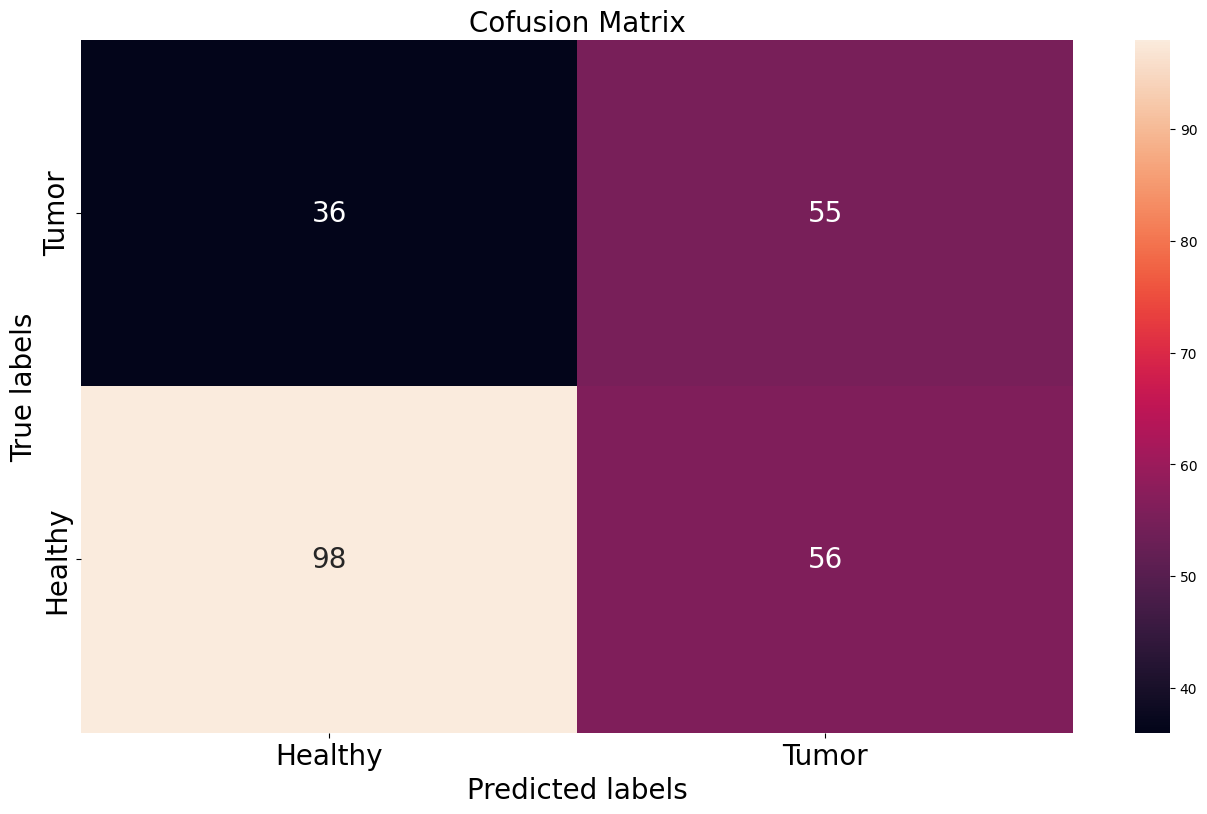

In [65]:
# a better confusion matrix
import seaborn as sns
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size":20})

# labels, titles and ticks
ax.set_xlabel("Predicted labels", fontsize=20)
ax.set_ylabel("True labels", fontsize=20)
ax.set_title("Cofusion Matrix", fontsize=20)
ax.xaxis.set_ticklabels(['Healthy', 'Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor', 'Healthy'], fontsize=20)

# Our model is predicting everything to be tumor. So, accordint to our model everybody had tumor.

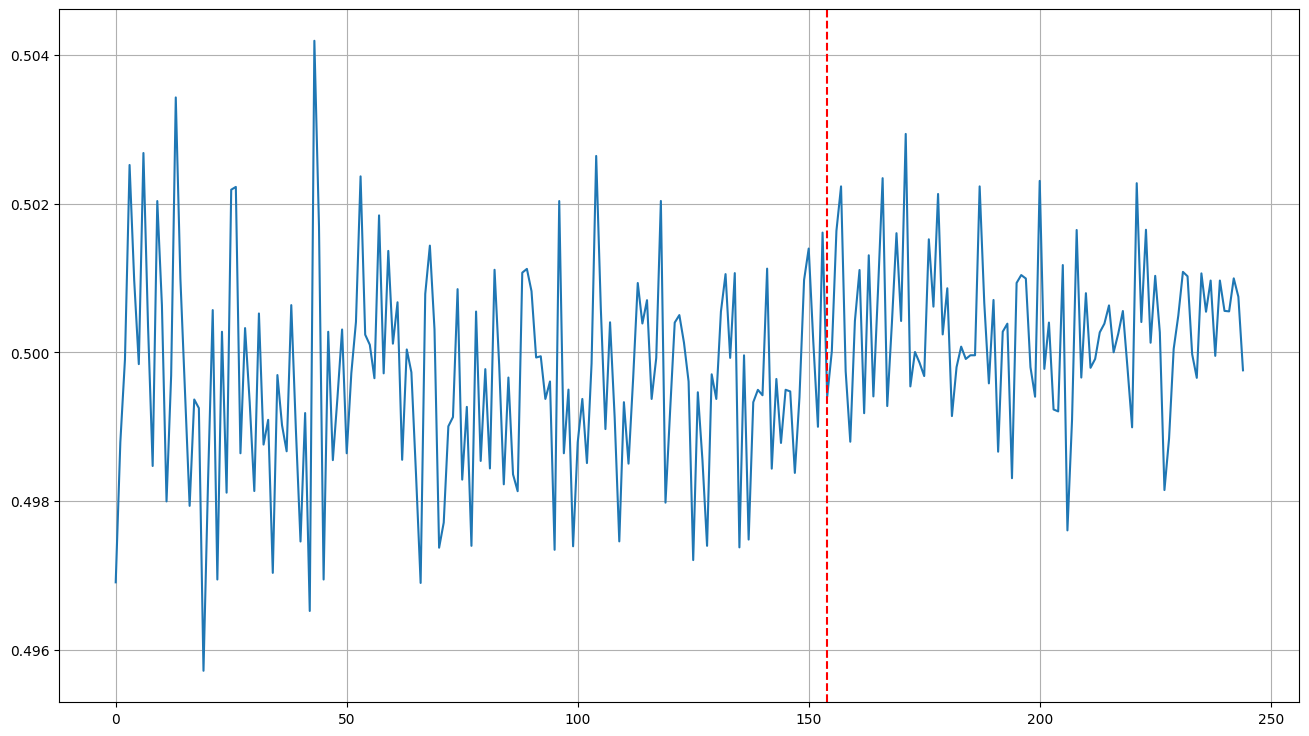

In [66]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# y axis is our output. it is our sigmoid fuction. 
# Red line: all apear left hand side belongs to the positive class when the output belongs to the tumor class. Everything on right hand side belongs to the healthy class.

### Train the dumb model

In [67]:
mri_dataset_to_train_the_neural_network = MRIDataset()
mri_dataset_to_train_the_neural_network.normalize()

In [68]:
# In order to train a model in pytorch, we need the learning rate, we need to define an optimizer, we need our dataloader then we can use model.train command
eta = 0.0001 # learning rate
EPOCH = 400 # 

optimizer = torch.optim.Adam(model.parameters(), lr=eta) # optimizer: the optimizer dictates how we walk on the error surface with the hopes of finding the global minimum or a very good local minimum. Very well known optimizer is known is as Adam. Adam is an optimization technique that uses momentum and it has adaptability of leanring rate capability.
# What we need to passs to our optimizer? All the learnable parameters of our model. Basically, i am saying to optimizer, look, i want to optimize these parameters. and second parameter that is required is the initial learning rate.

dataloader_to_train_the_neural_network = DataLoader(mri_dataset_to_train_the_neural_network, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

![Optimizer](./Optimizer.gif)

In [69]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader_to_train_the_neural_network:
        optimizer.zero_grad() # always make sure to reset the optimzer. It make sure that, zeroing all the gradients
        data = D['image']
        label = D['label']
        y_hat = model(data) # Prediction of the model.
        # print(y_hat.shape): torch.Size([32,1]): We need to get rid of the extra dimention
        # print(label.shape): torch.Size([32]): 32 because of batch_size

        # print(y_hat.squeeze().shape): torch.Size([32]) Now, both are 32
        # sys.exit()
        
        #define loss function: binary classification

        # THIS IS THE FORWARD PASS OF OUR NEURAL NETWORK
        error = nn.BCELoss() # We define a loss object or an error object. 
        loss = torch.sum(error(y_hat.squeeze(), label)) # then i have pass ground truth and y_hat to my error object. To match the dimentionality, we need to squeeze() it. We have got 32 values in the prediction and 32 values in the labels. Now, we need to merge these together. Usually, what we do is to sum them up by method of aggregation. Compute the error

        # BACKWARD PASS OF OUR NEURAL NETWORK
        loss.backward() # this computes back propagation. Compute the gradients

        optimizer.step() # after computing the back propagation and compute the gradients, we need to use those gradients by the rules dictated by our optimizer to update the parameters of our model. Then take a step and update the parameters.

        losses.append(loss.item()) # loss is a tensor. In order to get the value of the loss, we need to call item(). item() command actually grabs the value of a tensor.
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tloss: {:.6f}'.format(epoch+1, np.mean(losses)))
    

Train Epoch: 10	loss: 0.643204
Train Epoch: 20	loss: 0.628961
Train Epoch: 30	loss: 0.613883
Train Epoch: 40	loss: 0.577595
Train Epoch: 50	loss: 0.541719
Train Epoch: 60	loss: 0.504951
Train Epoch: 70	loss: 0.484326
Train Epoch: 80	loss: 0.477923
Train Epoch: 90	loss: 0.456482
Train Epoch: 100	loss: 0.444625
Train Epoch: 110	loss: 0.428668
Train Epoch: 120	loss: 0.426294
Train Epoch: 130	loss: 0.396228
Train Epoch: 140	loss: 0.381612
Train Epoch: 150	loss: 0.362099
Train Epoch: 160	loss: 0.362576
Train Epoch: 170	loss: 0.327101
Train Epoch: 180	loss: 0.326691
Train Epoch: 190	loss: 0.302331
Train Epoch: 200	loss: 0.275416
Train Epoch: 210	loss: 0.266028
Train Epoch: 220	loss: 0.265463
Train Epoch: 230	loss: 0.231762
Train Epoch: 240	loss: 0.234704
Train Epoch: 250	loss: 0.221874
Train Epoch: 260	loss: 0.201298
Train Epoch: 270	loss: 0.192208
Train Epoch: 280	loss: 0.174306
Train Epoch: 290	loss: 0.178225
Train Epoch: 300	loss: 0.157493
Train Epoch: 310	loss: 0.136755
Train Epoch: 320	

## Evaluate a smart model

In [77]:
model.eval()
dataloader_to_train_the_neural_network = DataLoader(mri_dataset_to_train_the_neural_network, batch_size=32, shuffle=False)
outputs = []
y_true = []

with torch.no_grad():
    for D in dataloader_to_train_the_neural_network:
        image = D['image']
        label = D['label']

        y_hat = model(image)
        outputs.append(y_hat.numpy())
        y_true.append(label.numpy())
    

In [78]:
# Convert list of numpy arrays to a single numpy array
outputs = np.concatenate(outputs, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Apply threshold function (assuming it is a separate function)
thresholded_outputs = threshold(outputs)

# Calculate accuracy
accuracy = accuracy_score(y_true, thresholded_outputs)
print(f'Accuracy: {accuracy}')
# accuracy_score(y_true, threshold(outputs))

Accuracy: 0.9959183673469387


[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

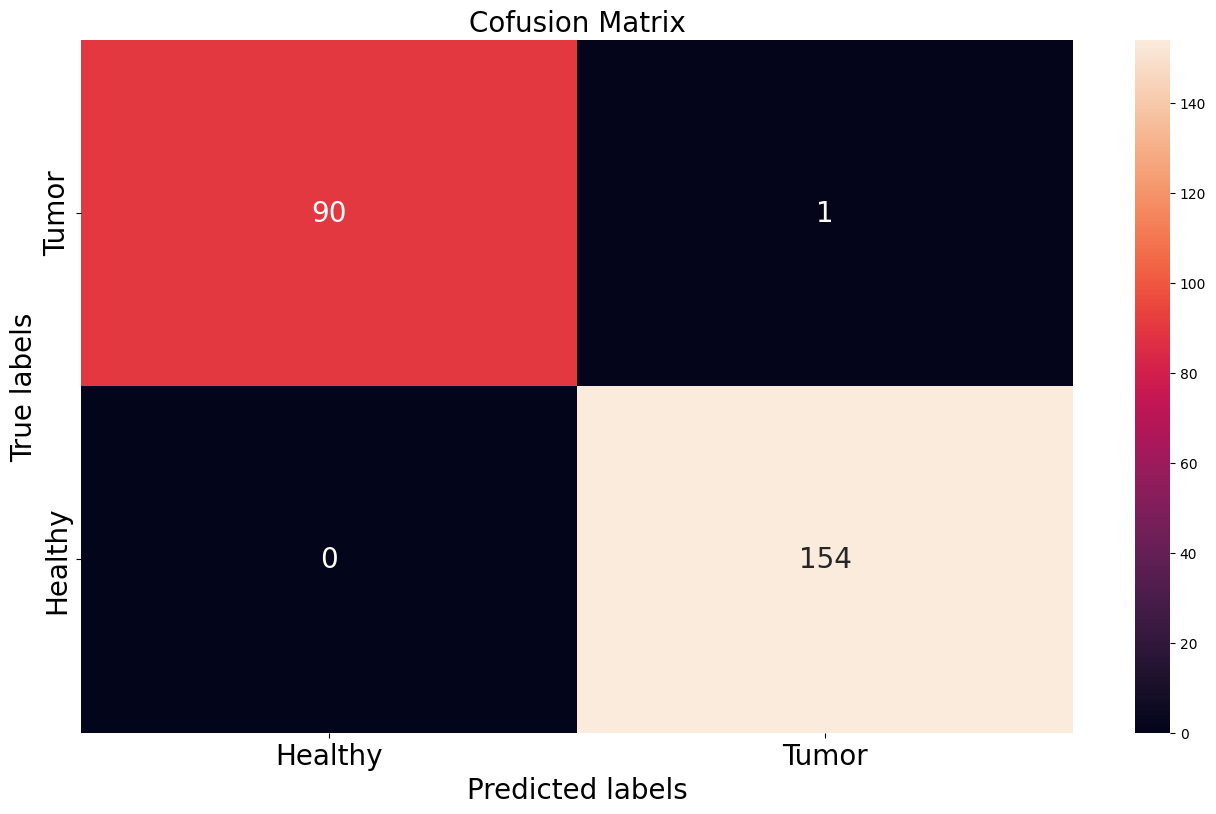

In [72]:
# a better confusion matrix
import seaborn as sns
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size":20})

# labels, titles and ticks
ax.set_xlabel("Predicted labels", fontsize=20)
ax.set_ylabel("True labels", fontsize=20)
ax.set_title("Cofusion Matrix", fontsize=20)
ax.xaxis.set_ticklabels(['Healthy', 'Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor', 'Healthy'], fontsize=20)

# All thee 

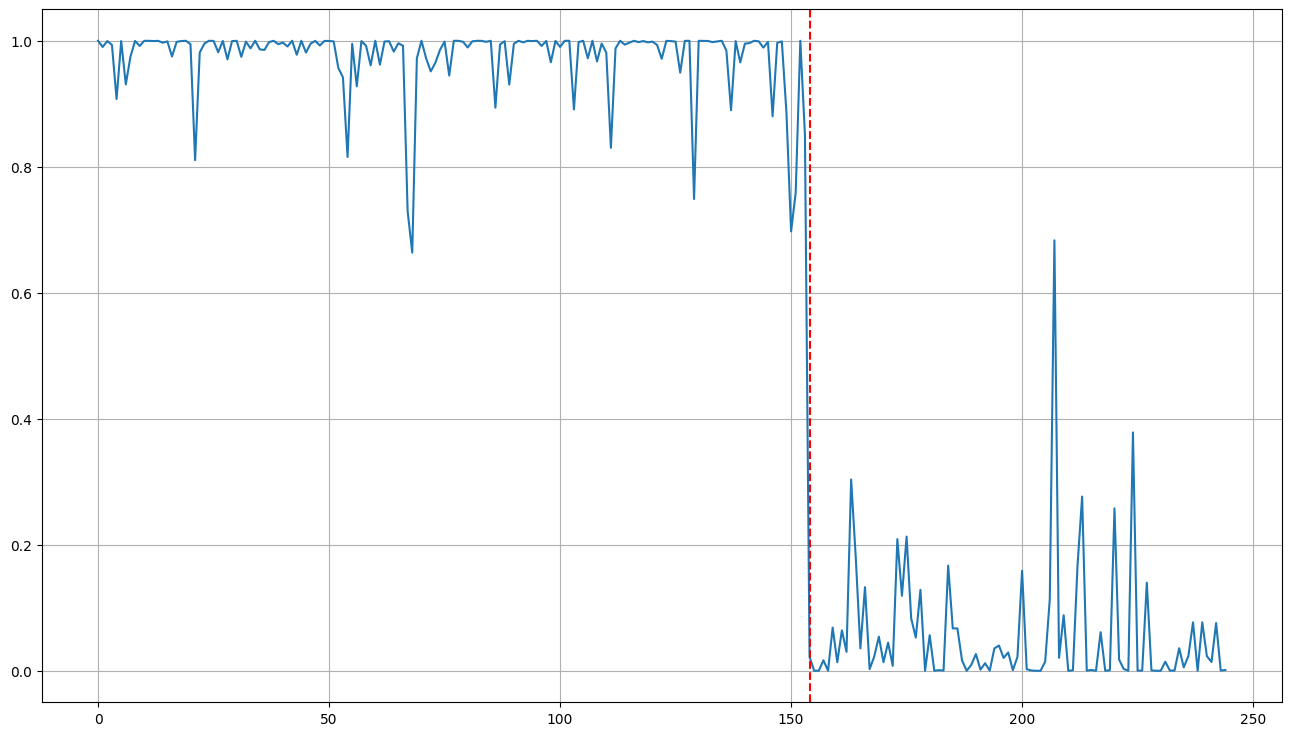

In [73]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# All the inputs close to 1 are tumor imagas. and all the inputs close to 0 are healthy images